# Active Minutes vs Sleep Time

Utilizing data derived from Fitbit devices, this study analyzes the relationship between individuals' sleep duration and the intensity of their physical activities, distance covered, step count, and caloric expenditure. The data set was obtained from [this FitBit fitness tracker data set on Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit?resource=download). The Fitbit data dictionary is available in .pdf form [here](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf).

Fitbit users within the dataset were assigned unique ID numbers and observed multiple times daily over a span of 22 days. Distance measurements, recorded in kilometers, were categorized into three levels: Very Active Distance, Moderately Active Distance, and Fairly Active Distance. Intensity, measured in minutes, was also segmented into three tiers: Very Active Minutes, Fairly Active Minutes, and Lightly Active Minutes. Sleep patterns were classified by this study into three groups: 300-399 minutes of sleep (MoS), 400-499 MoS, and 500+ MoS.

However, it's worth noting that the dataset has certain limitations due to its limited size, comprising only 19 individuals. Additionally, the distribution across the three sleep duration categories is uneven: 5 participants reported 300-399 MoS, 11 reported 400-499 MoS, and merely 3 reported 500+ MoS.

In contrast to the 500+ MoS group, both the 300-399 and 400-499 MoS groups exhibited higher average values for total steps and calories burned. Furthermore, they demonstrated elevated levels across nearly all intensity and distance categories. The singular category where the 500+ MoS group showcased the highest average was in Average Lightly Active Minutes. Notably, the 300-399 MoS group displayed the highest average in terms of Very Active Distance.

Moreover, the 500+ MoS group exhibited a notably substantial percentage difference in comparison to the other groups. In relation to the 400-499 MoS group, the Average Fairly Active Minutes for the 500+ MoS group were 61% lower, and when compared to the 300-399 MoS group, they were 59% lower. Furthermore, the Average Total Distance for the 500+ MoS group was 32% lower than the 400-499 MoS group and 25% lower than the 300-399 MoS group. Regarding Average Total Steps, the 500+ MoS group showed an average that was 24% lower than that of the 400-499 MoS group, and 23% lower than the 300-399 MoS group. 

The 400-499 MoS group burned significantly more calories than the other groups - 30% more compared to the 500+ MoS group, and 24% more compared to the 300-399 MoS group.

Conclusions:
Getting more sleep doesn't necessarily result in a higher intensity of physical activities, covering greater distances, or achieving higher step counts. This was evident as individuals with a MoS score of 500 or more displayed notably lower performance in these aspects. If the goal is to burn calories and manage weight, the optimal approach involves aiming for a MoS score between 400 and 499, coupled with maintaining a step count of about 8000 steps. 

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Files to load

daily_activity_to_load = "dailyActivity_merged.csv"
sleep_to_load = "sleepDay_merged.csv"

# Store files in dataframes 

daily_activity = pd.read_csv(daily_activity_to_load)
sleep = pd.read_csv(sleep_to_load)

print("Daily Activity Data")
display(daily_activity.head())

print("Sleep Data")
display(sleep.head())

Daily Activity Data


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Sleep Data


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [3]:
# Rename the ActivityDate and SleepDay columns as Date in the daily_activity and sleep dataframes
daily_activity.rename(columns={"ActivityDate": "Date"}, inplace=True)
sleep.rename(columns={"SleepDay": "Date"}, inplace=True)


In [4]:
#Display the daily_activity data frame and confirm column name changed to Date
print(daily_activity.columns.values)

#Display the sleep data frame and confirm column name changed to Date
print(sleep.columns.values)

['Id' 'Date' 'TotalSteps' 'TotalDistance' 'TrackerDistance'
 'LoggedActivitiesDistance' 'VeryActiveDistance'
 'ModeratelyActiveDistance' 'LightActiveDistance'
 'SedentaryActiveDistance' 'VeryActiveMinutes' 'FairlyActiveMinutes'
 'LightlyActiveMinutes' 'SedentaryMinutes' 'Calories']
['Id' 'Date' 'TotalSleepRecords' 'TotalMinutesAsleep' 'TotalTimeInBed']


In [5]:
# Check daily_activity data frame date types
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   Date                      940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
# Convert "Date" column in the daily_activity data frame to datetime data type
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])

# Confirm conversion
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
# Convert "Date" column in the Sleep dataframe to datetime data type and extract only the date
sleep['Date'] = pd.to_datetime(sleep['Date']).dt.floor('D')

# Confirm conversion
sleep.info()

# Confirm time was removed from the Date column in the sleep data frame
sleep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   Date                413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [8]:
# Merge daily_activity and sleep DataFrames on both "Id" and "Date"
merged_data = pd.merge(daily_activity, sleep, on=['Id', 'Date'], how='inner')
merged_data

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545


In [9]:
# Determine if 'TotalDistance' and 'TrackerDistance' columns do not have the same values
# Display the rows where the values are not the same
rows_with_different_values = merged_data[(merged_data['TotalDistance'] != merged_data['TrackerDistance'])]
print("Rows with different values in 'TotalDistance' and 'TrackerDistance':")
rows_with_different_values

Rows with different values in 'TotalDistance' and 'TrackerDistance':


,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
315,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1,451,457
319,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,1,400,415
333,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,1,489,497


In [10]:
# Count the number of "Id" values with a positive value in the "SedentaryActiveDistance" column
count_positive_distance = merged_data[merged_data['SedentaryActiveDistance'] > 0]['Id'].nunique()

print("Number of Id values with positive SedentaryActiveDistance:", count_positive_distance)


Number of Id values with positive SedentaryActiveDistance: 2


In [11]:
columns_to_drop = ['TrackerDistance', 'SedentaryActiveDistance', 'TotalTimeInBed', 'TotalSleepRecords', 'SedentaryMinutes', 'LoggedActivitiesDistance']

print(f"Size of dataframe before drop: {merged_data.shape}")

merged_data.drop(columns=columns_to_drop, inplace=True)
print(f"Size of dataframe after drop: {merged_data.shape}")


Size of dataframe before drop: (413, 18)
Size of dataframe after drop: (413, 12)


In [12]:
# Check for common 'Id' values between the daily_activity and sleep DataFrames
common_ids = set(daily_activity['Id']).intersection(sleep['Id'])
print("Number of common 'Id' values between the daily_activity and sleep DataFrames:", len(common_ids))

# Check for duplicate rows in merged_data DataFrame
duplicates_in_merged = merged_data.duplicated().sum()
print("Number of duplicate rows in merged_data DataFrame:", duplicates_in_merged)

# Verify the length of the merged DataFrame
print("Number of rows in merged_data dataframe:", len(merged_data))

# Remove duplicates based on all columns
merged_data = merged_data.drop_duplicates()

print("\n")
print("Post-duplicate dropping:")

# Confirm duplicate rows in merged_data DataFrame were dropped
duplicates_in_merged = merged_data.duplicated().sum()
print("Number of duplicate rows in merged_data DataFrame:", duplicates_in_merged)

# Verify the length of the merged DataFrame
print("Number of rows in merged_data dataframe:", len(merged_data))



Number of common 'Id' values between the daily_activity and sleep DataFrames: 24
Number of duplicate rows in merged_data DataFrame: 3
Number of rows in merged_data dataframe: 413


Post-duplicate dropping:
Number of duplicate rows in merged_data DataFrame: 0
Number of rows in merged_data dataframe: 410


In [13]:
# Check for NaNs in the merged_data DataFrame
nan_df = merged_data.isnull()

# Count the number of NaNs in each column
nan_counts_per_column = merged_data.isnull().sum()

# Count the total number of NaNs in the DataFrame
total_nans = merged_data.isnull().sum().sum()

# Display the result

print("\nNumber of NaNs in each column:")
print(nan_counts_per_column)

print("\nTotal number of NaNs in the DataFrame:", total_nans)


Number of NaNs in each column:
Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
Calories                    0
TotalMinutesAsleep          0
dtype: int64

Total number of NaNs in the DataFrame: 0


In [14]:
# Confirm data types of merged_data data frame
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   Date                      410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   VeryActiveDistance        410 non-null    float64       
 5   ModeratelyActiveDistance  410 non-null    float64       
 6   LightActiveDistance       410 non-null    float64       
 7   VeryActiveMinutes         410 non-null    int64         
 8   FairlyActiveMinutes       410 non-null    int64         
 9   LightlyActiveMinutes      410 non-null    int64         
 10  Calories                  410 non-null    int64         
 11  TotalMinutesAsleep        410 non-null    int64         
dtypes: datetime64[ns](1), 

In [15]:

# Z Score calculations to identify outliers for each column
threshold = 3

for col in merged_data.columns:
    # Check if the column is of numeric data type
    if pd.api.types.is_numeric_dtype(merged_data[col]):
        # Calculate the Z-scores for the column
        z_scores = np.abs((merged_data[col] - merged_data[col].mean()) / merged_data[col].std())
        
        # Identify and remove outliers based on the threshold
        merged_data = merged_data[(z_scores <= threshold)]
        
    else:
        # Column is not numeric, so skip over it
        continue
    
    print(col)
    print (len(merged_data))

Id
410
TotalSteps
408
TotalDistance
406
VeryActiveDistance
399
ModeratelyActiveDistance
387
LightActiveDistance
385
VeryActiveMinutes
381
FairlyActiveMinutes
375
LightlyActiveMinutes
372
Calories
371
TotalMinutesAsleep
364


In [16]:
merged_data.corr()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalMinutesAsleep
Id,1.000000,-0.032687,0.036952,0.143906,0.030245,-0.087303,0.258711,0.063055,-0.207045,0.418461,0.074865
TotalSteps,-0.032687,1.000000,0.979752,0.697647,0.647055,0.673699,0.561516,0.605152,0.492571,0.326647,-0.189639
TotalDistance,0.036952,0.979752,1.000000,0.708062,0.640138,0.699442,0.593711,0.596870,0.458892,0.457916,-0.188446
VeryActiveDistance,0.143906,0.697647,0.708062,1.000000,0.420338,0.041159,0.863195,0.458282,-0.124916,0.331125,-0.175065
ModeratelyActiveDistance,0.030245,0.647055,0.640138,0.420338,1.000000,0.238823,0.351945,0.910409,0.079994,0.170705,-0.186626
LightActiveDistance,-0.087303,0.673699,0.699442,0.041159,0.238823,1.000000,0.011445,0.168583,0.829589,0.362097,-0.065458
VeryActiveMinutes,0.258711,0.561516,0.593711,0.863195,0.351945,0.011445,1.000000,0.463452,-0.178389,0.537771,-0.190239
FairlyActiveMinutes,0.063055,0.605152,0.596870,0.458282,0.910409,0.168583,0.463452,1.000000,0.036641,0.272941,-0.202338
LightlyActiveMinutes,-0.207045,0.492571,0.458892,-0.124916,0.079994,0.829589,-0.178389,0.036641,1.000000,0.100226,0.016965
Calories,0.418461,0.326647,0.457916,0.331125,0.170705,0.362097,0.537771,0.272941,0.100226,1.000000,-0.122591


In [17]:

# Calculate the average of VeryActiveMinutes
average_very_active_minutes = merged_data['VeryActiveMinutes'].mean()

# Display the average of VeryActiveMinutes 
print("Average of VeryActiveMinutes:", average_very_active_minutes)

# Calculate the average of FairlyActiveMinutes
average_fairly_active_minutes = merged_data['FairlyActiveMinutes'].mean()

# Display the average of FairlyActiveMinutes 
print("Average of FairlyActiveMinutes:", average_fairly_active_minutes)

# Calculate the average of LightlyActiveMinutes
average_lightly_active_minutes = merged_data['LightlyActiveMinutes'].mean()

# Display the average of LightlyActiveMinutes 
print("Average of LightlyActiveMinutes:", average_lightly_active_minutes)


Average of VeryActiveMinutes: 21.546703296703296
Average of FairlyActiveMinutes: 13.956043956043956
Average of LightlyActiveMinutes: 216.89285714285714


In [18]:
merged_data.Id.value_counts()

6962181067    31
5553957443    30
8378563200    29
2026352035    28
4445114986    28
1503960366    25
4702921684    24
4319703577    24
7086361926    22
4388161847    20
5577150313    18
8792009665    15
3977333714    15
2347167796    15
6117666160    13
4020332650     8
1927972279     5
4558609924     5
6775888955     3
1844505072     3
1644430081     2
7007744171     1
Name: Id, dtype: int64

In [19]:
# Calculate the average of 'TotalMinutesAsleep' for each ID
average_minutes_asleep = merged_data.groupby('Id')['TotalMinutesAsleep'].mean()

print("Average TotalMinutesAsleep for each ID:")
print(average_minutes_asleep)

Average TotalMinutesAsleep for each ID:
Id
1503960366    360.280000
1644430081    128.000000
1844505072    652.000000
1927972279    417.000000
2026352035    506.178571
2347167796    446.800000
3977333714    319.466667
4020332650    349.375000
4319703577    501.333333
4388161847    407.050000
4445114986    385.178571
4558609924    127.600000
4702921684    405.666667
5553957443    453.100000
5577150313    444.777778
6117666160    490.846154
6775888955    349.666667
6962181067    448.000000
7007744171     79.000000
7086361926    450.500000
8378563200    443.206897
8792009665    435.666667
Name: TotalMinutesAsleep, dtype: float64


In [20]:
# Get the highest number in 'TotalMinutesAsleep' for ID 1644430081
highest_minutes = merged_data.loc[merged_data['Id'] == 1644430081, 'TotalMinutesAsleep'].max()

print("The highest number in 'TotalMinutesAsleep' for ID 1644430081 is:", highest_minutes)

# Get the highest number in 'TotalMinutesAsleep' for ID 4558609924
highest_minutes = merged_data.loc[merged_data['Id'] == 4558609924, 'TotalMinutesAsleep'].max()

print("The highest number in 'TotalMinutesAsleep' for ID 4558609924 is:", highest_minutes)


The highest number in 'TotalMinutesAsleep' for ID 1644430081 is: 137
The highest number in 'TotalMinutesAsleep' for ID 4558609924 is: 171


In [21]:
# Filter the DataFrame to keep only rows with average sleep time >= 300 minutes
filtered_data = merged_data[merged_data['Id'].isin(average_minutes_asleep[average_minutes_asleep >= 300].index)]

print("Filtered DataFrame:")
filtered_data

Filtered DataFrame:


,Id,Date,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalMinutesAsleep
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,1985,327
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,1797,384
2,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,1745,412
3,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,1863,340
4,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,1728,700
...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,0.33,0.36,3.91,10,20,301,2896,343
409,8792009665,2016-05-01,1619,1.04,0.00,0.00,1.04,0,0,79,1962,503
410,8792009665,2016-05-02,1831,1.17,0.00,0.00,1.17,0,0,101,2015,415
411,8792009665,2016-05-03,2421,1.55,0.00,0.00,1.55,0,0,156,2297,516


In [22]:
#Confirm IDs with average sleep time >= 300 minutes are in the data frame

# Calculate the average of 'TotalMinutesAsleep' for each ID
average_minutes_asleep = filtered_data.groupby('Id')['TotalMinutesAsleep'].mean()

print("Average TotalMinutesAsleep for each ID:")
print(average_minutes_asleep)

Average TotalMinutesAsleep for each ID:
Id
1503960366    360.280000
1844505072    652.000000
1927972279    417.000000
2026352035    506.178571
2347167796    446.800000
3977333714    319.466667
4020332650    349.375000
4319703577    501.333333
4388161847    407.050000
4445114986    385.178571
4702921684    405.666667
5553957443    453.100000
5577150313    444.777778
6117666160    490.846154
6775888955    349.666667
6962181067    448.000000
7086361926    450.500000
8378563200    443.206897
8792009665    435.666667
Name: TotalMinutesAsleep, dtype: float64


In [23]:
# Get the highest number in the 'VeryActiveMinutes' column
highest_value = merged_data['VeryActiveMinutes'].max()

print("The highest value in the 'VeryActiveMinutes' column is:", highest_value)

The highest value in the 'VeryActiveMinutes' column is: 123


In [24]:

# Filter IDs with an average sleep time between 300 and 399 minutes
filtered_ids = average_minutes_asleep[(average_minutes_asleep >= 300) & (average_minutes_asleep <= 399)].index

# Calculate the average of 'VeryActiveMinutes' for the filtered IDs
average_very_active_minutes = merged_data[merged_data['Id'].isin(filtered_ids)]['VeryActiveMinutes'].mean()

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_very_active_minutes)


Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 300 and 399:
21.253164556962027


In [25]:
# Filter IDs with an average sleep time between 400 and 499 minutes
filtered_ids = average_minutes_asleep[(average_minutes_asleep >= 400) & (average_minutes_asleep <= 499)].index

# Calculate the average of 'VeryActiveMinutes' for the filtered IDs
average_very_active_minutes = merged_data[merged_data['Id'].isin(filtered_ids)]['VeryActiveMinutes'].mean()

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_very_active_minutes)


Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 400 and 499:
27.0


In [26]:

# Filter IDs with an average sleep time of over 500 minutes
filtered_ids = average_minutes_asleep[(average_minutes_asleep >= 500)].index

# Calculate the average of 'VeryActiveMinutes' for the filtered IDs
average_very_active_minutes = merged_data[merged_data['Id'].isin(filtered_ids)]['VeryActiveMinutes'].mean()

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep of over 500 minutes:")
print(average_very_active_minutes)


Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep of over 500 minutes:
1.290909090909091


In [27]:

# Filter Ids based on average TotalMinutesAsleep ranges
filtered_ids_300_399 = average_minutes_asleep[(average_minutes_asleep >= 300) & (average_minutes_asleep <= 399)].index
filtered_ids_400_499 = average_minutes_asleep[(average_minutes_asleep >= 400) & (average_minutes_asleep <= 499)].index
filtered_ids_500_plus = average_minutes_asleep[(average_minutes_asleep >= 500)].index

# Count unique Ids in each range
count_300_399 = len(filtered_ids_300_399)
count_400_499 = len(filtered_ids_400_499)
count_500_plus = len(filtered_ids_500_plus)

print("Number of Ids with average_minutes_asleep between 300 and 399:", count_300_399)
print("Number of Ids with average_minutes_asleep between 400 and 499:", count_400_499)
print("Number of Ids with average_minutes_asleep 500 or more:", count_500_plus)

Number of Ids with average_minutes_asleep between 300 and 399: 5
Number of Ids with average_minutes_asleep between 400 and 499: 11
Number of Ids with average_minutes_asleep 500 or more: 3


Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 300 and 399:
21.253164556962027
Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 400 and 499:
27.0
Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 500 and 599:
1.290909090909091


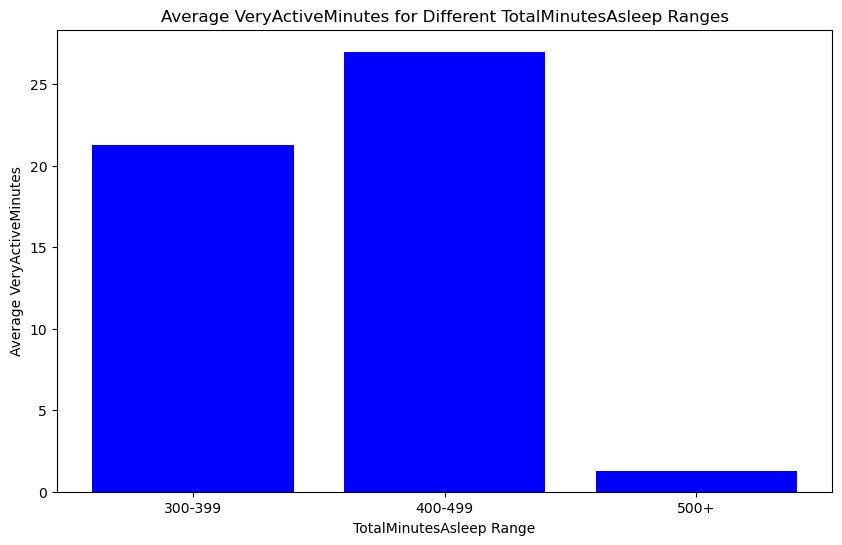

In [28]:
# Calculate the averages of 'VeryActiveMinutes' for each Id range
average_very_active_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['VeryActiveMinutes'].mean()
average_very_active_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['VeryActiveMinutes'].mean()
average_very_active_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['VeryActiveMinutes'].mean()

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_very_active_300_399)

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_very_active_400_499)

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_very_active_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_very_active_300_399, average_very_active_400_499, average_very_active_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average VeryActiveMinutes for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average VeryActiveMinutes')
plt.show()

In [29]:

# Calculate percentage differences
va_percentage_diff_300_399_vs_400_499 = round(((average_very_active_400_499 - average_very_active_300_399) / average_very_active_300_399) * 100, 2)
va_percentage_diff_400_499_vs_500_plus = round(((average_very_active_500_plus - average_very_active_400_499) / average_very_active_400_499) * 100, 2)
va_percentage_diff_300_399_vs_500_plus = round(((average_very_active_500_plus - average_very_active_300_399) / average_very_active_300_399) * 100, 2)


# Display the percentage differences
print("For Average VeryActiveMinutes, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", va_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", va_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", va_percentage_diff_300_399_vs_500_plus)


For Average VeryActiveMinutes, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: 27.04
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -95.22
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: -93.93


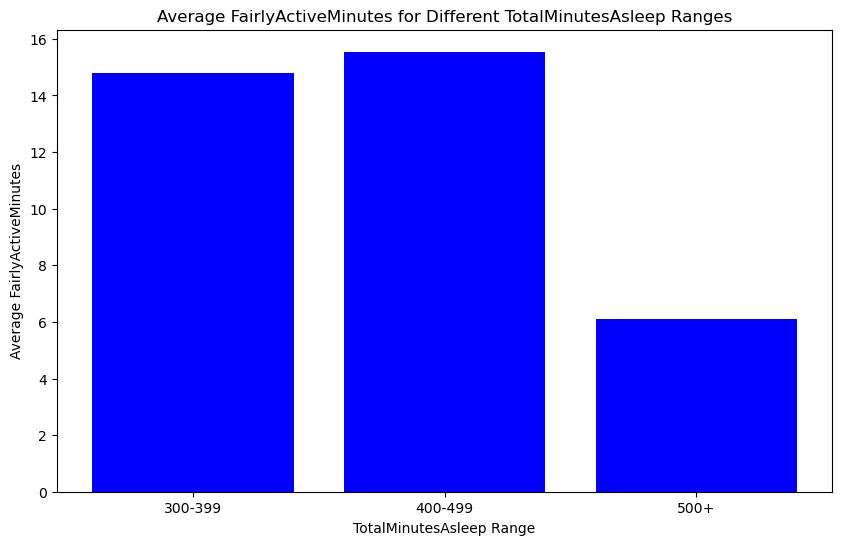

In [30]:
# Calculate the averages of 'FairlyActiveMinutes' for each Id range
average_fairly_active_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['FairlyActiveMinutes'].mean()
average_fairly_active_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['FairlyActiveMinutes'].mean()
average_fairly_active_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['FairlyActiveMinutes'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_fairly_active_300_399, average_fairly_active_400_499, average_fairly_active_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average FairlyActiveMinutes for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average FairlyActiveMinutes')
plt.show()

In [31]:
# Calculate percentage differences
fa_percentage_diff_300_399_vs_400_499 = round(((average_fairly_active_400_499 - average_fairly_active_300_399) / average_fairly_active_300_399) * 100, 2)
fa_percentage_diff_400_499_vs_500_plus = round(((average_fairly_active_500_plus - average_fairly_active_400_499) / average_fairly_active_400_499) * 100, 2)
fa_percentage_diff_300_399_vs_500_plus = round(((average_fairly_active_500_plus - average_fairly_active_300_399) / average_fairly_active_300_399) * 100, 2)


# Display the percentage differences
print("For Average FairlyActiveMinutes, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499:", fa_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+:", fa_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+:", fa_percentage_diff_300_399_vs_500_plus)


For Average FairlyActiveMinutes, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499: 5.14
Percentage Difference between TotalMinutesAsleep 400-499 and 500+: -60.82
Percentage Difference between TotalMinutesAsleep 300-399 and 500+: -58.8


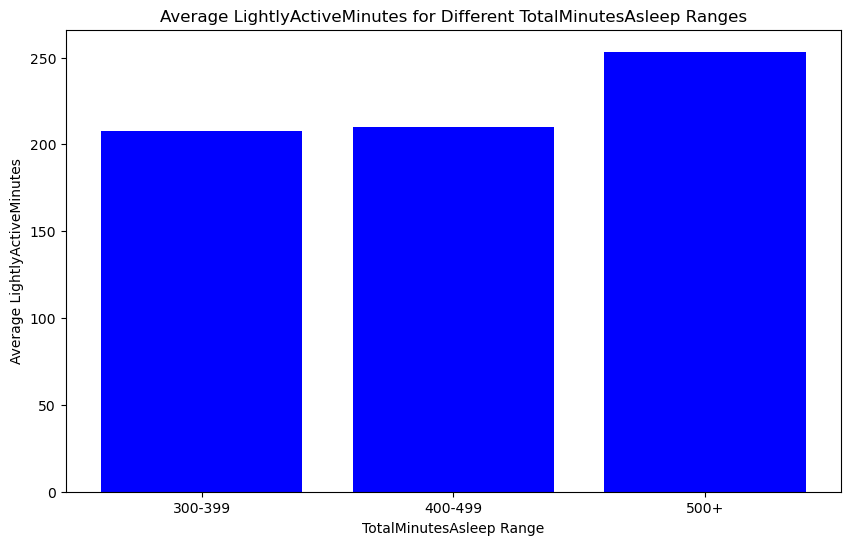

In [32]:
# Calculate the averages of 'LightlyActiveMinutes' for each Id range
average_lightly_active_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['LightlyActiveMinutes'].mean()
average_lightly_active_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['LightlyActiveMinutes'].mean()
average_lightly_active_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['LightlyActiveMinutes'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_lightly_active_300_399, average_lightly_active_400_499, average_lightly_active_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average LightlyActiveMinutes for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average LightlyActiveMinutes')
plt.show()

In [33]:
# Calculate percentage differences
la_percentage_diff_300_399_vs_400_499 = round(((average_lightly_active_400_499 - average_lightly_active_300_399) / average_lightly_active_300_399) * 100, 2)
la_percentage_diff_400_499_vs_500_plus = round(((average_lightly_active_500_plus - average_lightly_active_400_499) / average_lightly_active_400_499) * 100, 2)
la_percentage_diff_300_399_vs_500_plus = round(((average_lightly_active_500_plus - average_lightly_active_300_399) / average_lightly_active_300_399) * 100, 2)


# Display the percentage differences
print("For Average LightlyActiveMinutes, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499:", la_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+:", la_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+:", la_percentage_diff_300_399_vs_500_plus)


For Average LightlyActiveMinutes, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499: 1.17
Percentage Difference between TotalMinutesAsleep 400-499 and 500+: 20.55
Percentage Difference between TotalMinutesAsleep 300-399 and 500+: 21.97


Average of TotalSteps for IDs with average TotalMinutesAsleep between 300 and 399:
8270.12658227848
Average of TotalSteps for IDs with average TotalMinutesAsleep between 400 and 499:
8361.085585585586
Average of TotalSteps for IDs with average TotalMinutesAsleep between 500 and 599:
6350.836363636364


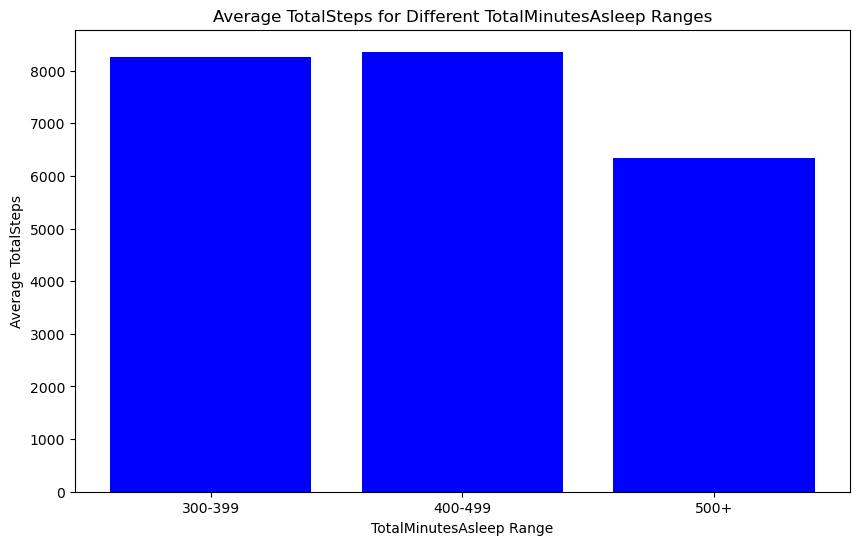

In [34]:
# Calculate the averages of 'TotalSteps' for each Id range
average_total_steps_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['TotalSteps'].mean()
average_total_steps_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['TotalSteps'].mean()
average_total_steps_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['TotalSteps'].mean()

print("Average of TotalSteps for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_total_steps_300_399)

print("Average of TotalSteps for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_total_steps_400_499)

print("Average of TotalSteps for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_total_steps_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_total_steps_300_399, average_total_steps_400_499, average_total_steps_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average TotalSteps for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average TotalSteps')
plt.show()



In [35]:
# Calculate percentage differences for average TotalSteps
ts_percentage_diff_300_399_vs_400_499 = round(((average_total_steps_400_499 - average_total_steps_300_399) / average_total_steps_300_399) * 100, 2)
ts_percentage_diff_400_499_vs_500_plus = round(((average_total_steps_500_plus - average_total_steps_400_499) / average_total_steps_400_499) * 100, 2)
ts_percentage_diff_300_399_vs_500_plus = round(((average_total_steps_500_plus - average_total_steps_300_399) / average_total_steps_300_399) * 100, 2)


# Display the percentage differences
print("For Average TotalSteps, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", ts_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", ts_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", ts_percentage_diff_300_399_vs_500_plus)


For Average TotalSteps, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: 1.1
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -24.04
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: -23.21


Average of TotalDistance for IDs with average TotalMinutesAsleep between 300 and 399:
5.517848078963123
Average of TotalDistance for IDs with average TotalMinutesAsleep between 400 and 499:
6.029369382968022
Average of TotalDistance for IDs with average TotalMinutesAsleep between 500 and 599:
4.118000001798977


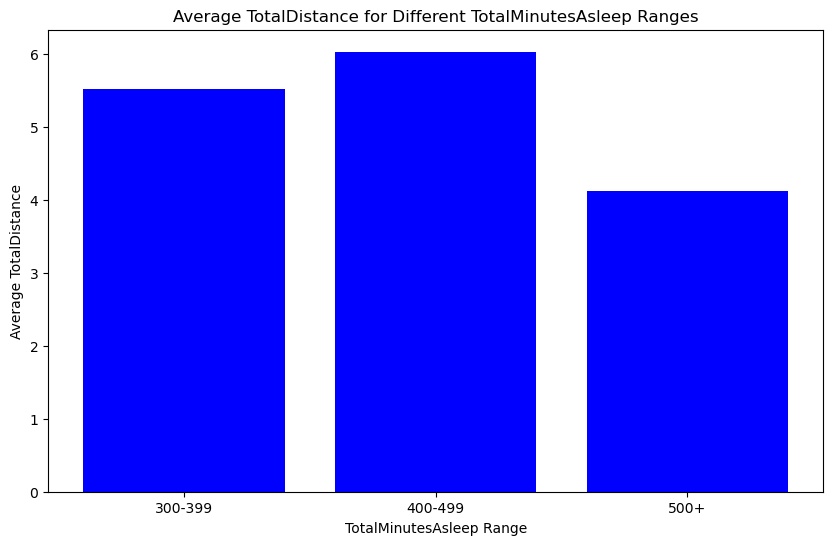

In [36]:
# Calculate the averages of 'TotalDistance' for each Id range
average_total_distance_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['TotalDistance'].mean()
average_total_distance_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['TotalDistance'].mean()
average_total_distance_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['TotalDistance'].mean()

print("Average of TotalDistance for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_total_distance_300_399)

print("Average of TotalDistance for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_total_distance_400_499)

print("Average of TotalDistance for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_total_distance_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_total_distance_300_399, average_total_distance_400_499, average_total_distance_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average TotalDistance for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average TotalDistance')
plt.show()



In [37]:
# Calculate percentage differences for average TotalDistance
td_percentage_diff_300_399_vs_400_499 = round(((average_total_distance_400_499 - average_total_distance_300_399) / average_total_distance_300_399) * 100, 2)
td_percentage_diff_400_499_vs_500_plus = round(((average_total_distance_500_plus - average_total_distance_400_499) / average_total_distance_400_499) * 100, 2)
td_percentage_diff_300_399_vs_500_plus = round(((average_total_distance_500_plus - average_total_distance_300_399) / average_total_distance_300_399) * 100, 2)


# Display the percentage differences
print("For Average TotalDistance, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", td_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", td_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", td_percentage_diff_300_399_vs_500_plus)


For Average TotalDistance, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: 9.27
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -31.7
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: -25.37


Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 300 and 399:
1.5493670855707762
Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 400 and 499:
1.4321621621514227
Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 500 and 599:
0.09199999895962806


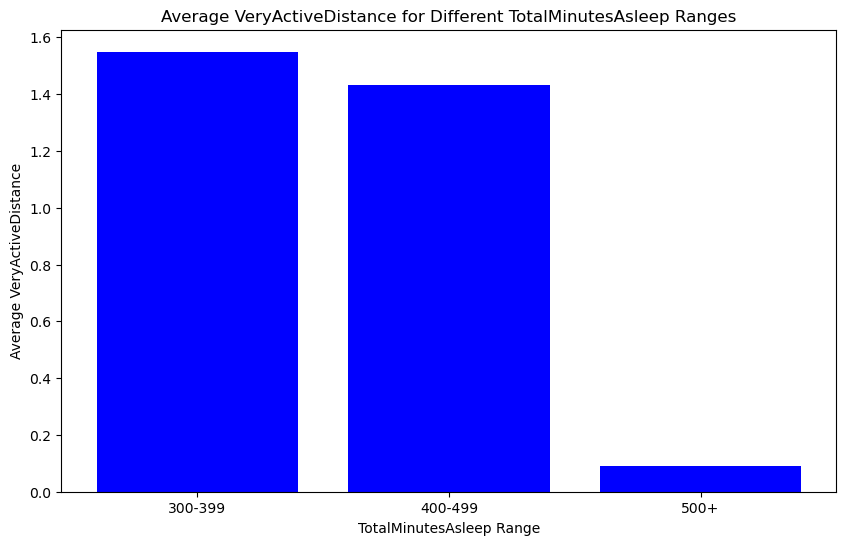

In [38]:
# Calculate the averages of 'VeryActiveDistance' for each Id range
average_very_active_dist_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['VeryActiveDistance'].mean()
average_very_active_dist_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['VeryActiveDistance'].mean()
average_very_active_dist_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['VeryActiveDistance'].mean()

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_very_active_dist_300_399)

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_very_active_dist_400_499)

print("Average of VeryActiveMinutes for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_very_active_dist_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_very_active_dist_300_399, average_very_active_dist_400_499, average_very_active_dist_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average VeryActiveDistance for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average VeryActiveDistance')
plt.show()

In [39]:
# Calculate percentage differences for average VeryActiveDistance
vad_percentage_diff_300_399_vs_400_499 = round(((average_very_active_dist_400_499 - average_very_active_dist_300_399) / average_very_active_dist_300_399) * 100, 2)
vad_percentage_diff_400_499_vs_500_plus = round(((average_very_active_dist_500_plus - average_very_active_dist_400_499) / average_very_active_dist_400_499) * 100, 2)
vad_percentage_diff_300_399_vs_500_plus = round(((average_very_active_dist_500_plus - average_very_active_dist_300_399) / average_very_active_dist_300_399) * 100, 2)


# Display the percentage differences
print("For Average VeryActiveDistance, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", vad_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", vad_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", vad_percentage_diff_300_399_vs_500_plus)


For Average VeryActiveDistance, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: -7.56
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -93.58
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: -94.06


Average of ModeratelyActiveDistance for IDs with average TotalMinutesAsleep between 300 and 399:
0.6007594881885793
Average of ModeratelyActiveDistance for IDs with average TotalMinutesAsleep between 400 and 499:
0.6550450438784587
Average of ModeratelyActiveDistance for IDs with average TotalMinutesAsleep between 500 and 599:
0.2472727285190062


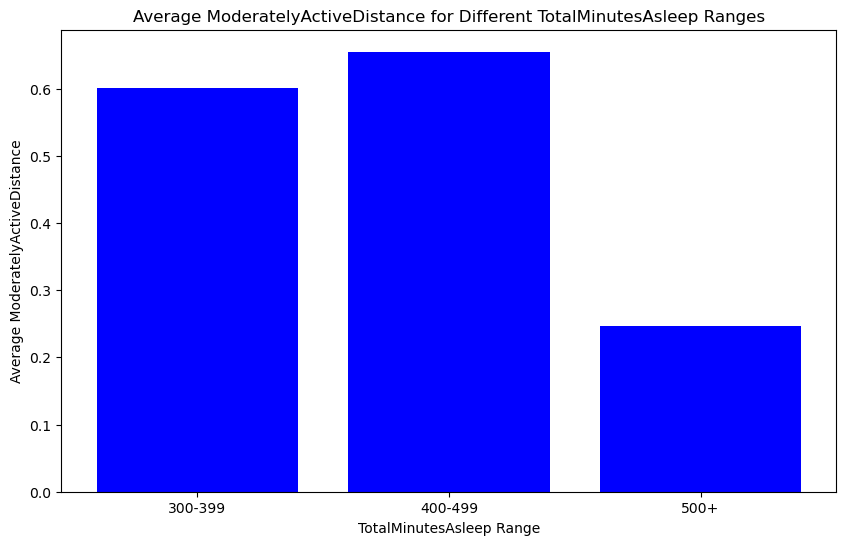

In [40]:
# Calculate the averages of 'ModeratelyActiveDistance' for each Id range
average_moderately_active_dist_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['ModeratelyActiveDistance'].mean()
average_moderately_active_dist_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['ModeratelyActiveDistance'].mean()
average_moderately_active_dist_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['ModeratelyActiveDistance'].mean()

print("Average of ModeratelyActiveDistance for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_moderately_active_dist_300_399)

print("Average of ModeratelyActiveDistance for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_moderately_active_dist_400_499)

print("Average of ModeratelyActiveDistance for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_moderately_active_dist_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_moderately_active_dist_300_399, average_moderately_active_dist_400_499, average_moderately_active_dist_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average ModeratelyActiveDistance for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average ModeratelyActiveDistance')
plt.show()

In [41]:
# Calculate percentage differences for average ModeratelyActiveDistance
mad_percentage_diff_300_399_vs_400_499 = round(((average_moderately_active_dist_400_499 - average_moderately_active_dist_300_399) / average_moderately_active_dist_300_399) * 100, 2)
mad_percentage_diff_400_499_vs_500_plus = round(((average_moderately_active_dist_500_plus - average_moderately_active_dist_400_499) / average_moderately_active_dist_400_499) * 100, 2)
mad_percentage_diff_300_399_vs_500_plus = round(((average_moderately_active_dist_500_plus - average_moderately_active_dist_300_399) / average_moderately_active_dist_300_399) * 100, 2)


# Display the percentage differences
print("For Average ModeratelyActiveDistance, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", mad_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", mad_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", mad_percentage_diff_300_399_vs_500_plus)


For Average ModeratelyActiveDistance, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: 9.04
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -62.25
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: -58.84


Average of LightActiveDistance for IDs with average TotalMinutesAsleep between 300 and 399:
3.358607603024833
Average of LightActiveDistance for IDs with average TotalMinutesAsleep between 400 and 499:
0.6550450438784587
Average of LightActiveDistance for IDs with average TotalMinutesAsleep between 500 and 599:
0.2472727285190062


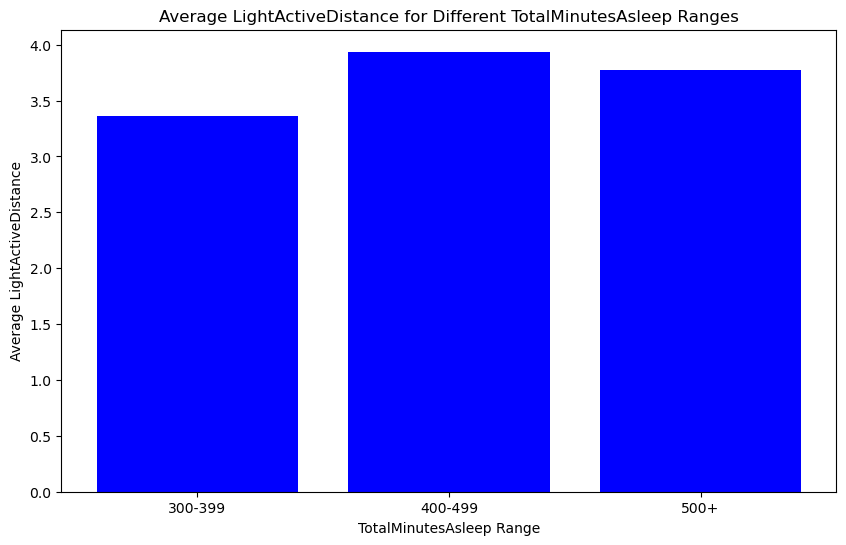

In [42]:
# Calculate the averages of 'LightActiveDistance' for each Id range
average_light_active_dist_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['LightActiveDistance'].mean()
average_light_active_dist_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['LightActiveDistance'].mean()
average_light_active_dist_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['LightActiveDistance'].mean()

print("Average of LightActiveDistance for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_light_active_dist_300_399)

print("Average of LightActiveDistance for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_moderately_active_dist_400_499)

print("Average of LightActiveDistance for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_moderately_active_dist_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_light_active_dist_300_399, average_light_active_dist_400_499, average_light_active_dist_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average LightActiveDistance for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average LightActiveDistance')
plt.show()

In [43]:
# Calculate percentage differences for average LightActiveDistance
lad_percentage_diff_300_399_vs_400_499 = round(((average_light_active_dist_400_499 - average_light_active_dist_300_399) / average_light_active_dist_300_399) * 100, 2)
lad_percentage_diff_400_499_vs_500_plus = round(((average_light_active_dist_500_plus - average_light_active_dist_400_499) / average_light_active_dist_400_499) * 100, 2)
lad_percentage_diff_300_399_vs_500_plus = round(((average_light_active_dist_500_plus - average_light_active_dist_300_399) / average_light_active_dist_300_399) * 100, 2)


# Display the percentage differences
print("For Average LightActiveDistance, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", lad_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", lad_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", lad_percentage_diff_300_399_vs_500_plus)


For Average LightActiveDistance, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: 17.21
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -4.14
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: 12.35


Average of Calories for IDs with average TotalMinutesAsleep between 300 and 399:
2064.9620253164558
Average of Calories for IDs with average TotalMinutesAsleep between 400 and 499:
2568.671171171171
Average of Calories for IDs with average TotalMinutesAsleep between 500 and 599:
1795.709090909091


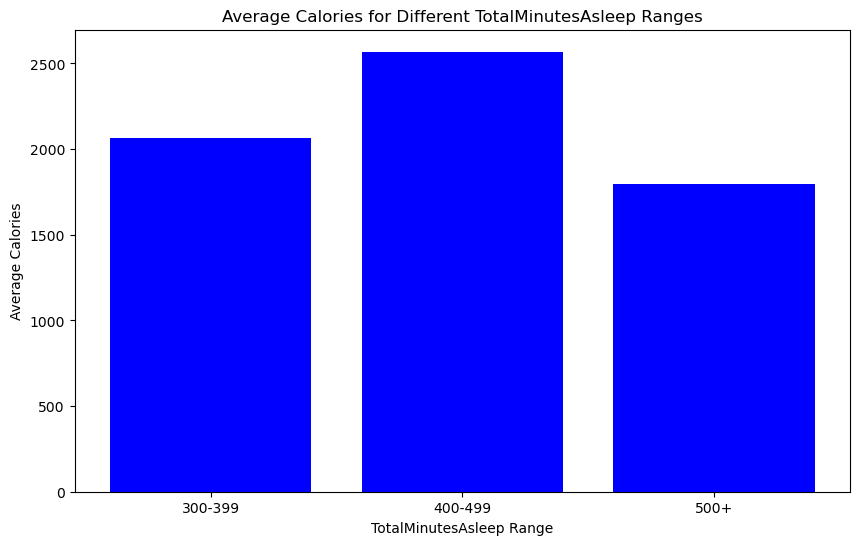

In [44]:
# Calculate the averages of 'Calories' for each Id range
average_calories_300_399 = merged_data[merged_data['Id'].isin(filtered_ids_300_399)]['Calories'].mean()
average_calories_400_499 = merged_data[merged_data['Id'].isin(filtered_ids_400_499)]['Calories'].mean()
average_calories_500_plus = merged_data[merged_data['Id'].isin(filtered_ids_500_plus)]['Calories'].mean()

print("Average of Calories for IDs with average TotalMinutesAsleep between 300 and 399:")
print(average_calories_300_399)

print("Average of Calories for IDs with average TotalMinutesAsleep between 400 and 499:")
print(average_calories_400_499)

print("Average of Calories for IDs with average TotalMinutesAsleep between 500 and 599:")
print(average_calories_500_plus)


# Create a bar chart
plt.figure(figsize=(10, 6))
ranges = ['300-399', '400-499', '500+']
averages = [average_calories_300_399, average_calories_400_499, average_calories_500_plus]
plt.bar(ranges, averages, color='blue')
plt.title('Average Calories for Different TotalMinutesAsleep Ranges')
plt.xlabel('TotalMinutesAsleep Range')
plt.ylabel('Average Calories')
plt.show()

In [45]:
# Calculate percentage differences for average Calories
calories_percentage_diff_300_399_vs_400_499 = round(((average_calories_400_499 - average_calories_300_399) / average_calories_300_399) * 100, 2)
calories_percentage_diff_400_499_vs_500_plus = round(((average_calories_500_plus - average_calories_400_499) / average_calories_400_499) * 100, 2)
calories_percentage_diff_300_399_vs_500_plus = round(((average_calories_500_plus - average_calories_300_399) / average_calories_300_399) * 100, 2)


# Display the percentage differences
print("For Average Calories, the:")
print("Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs:", calories_percentage_diff_300_399_vs_400_499)
print("Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs:", calories_percentage_diff_400_499_vs_500_plus)
print("Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs:", calories_percentage_diff_300_399_vs_500_plus)


For Average Calories, the:
Percentage Difference between TotalMinutesAsleep 300-399 and 400-499 IDs: 24.39
Percentage Difference between TotalMinutesAsleep 400-499 and 500+ IDs: -30.09
Percentage Difference between TotalMinutesAsleep 300-399 and 500+ IDs: -13.04
